In [1]:
import os
import time
import random
import requests
import pandas as pd
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import pickle
import re

/Users/evanfrangipane/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# URL of the website
base_url = "https://pkmncards.com/card/{}"

output_dir = "pokemon_card_illustrators"  # Name of the folder
os.makedirs(output_dir, exist_ok=True)

stop_scraping = False

# Lists to store data
illustrator_names = []

for card in sorted(os.listdir("cropped_images")):
    # Format the URL with the current page number
    if "gym-heroes" in card:
        card = re.sub(r"(-\d+\.jpg)$", r"-g1\1", card)
    elif "gym-challenge" in card:
        card = re.sub(r"(-\d+\.jpg)$", r"-g2\1", card)

    card_split = card.split('.jpg')[0]
    url = base_url.format(card_split)
    print(f"Scraping URL: {url}")
    if stop_scraping:
        print("Stopping scrape.")
        break
    # Fetch the page content
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve page {card}. Skipping.")
        continue

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract card details
    illus_div = soup.find("div", class_="illus minor-text")  # Adjust based on inspection
    illus_tag = illus_div.find('a').text
    illustrator_names.append(illus_tag)
    print(illus_tag)

    # Wait for a random time between 3 to 6 seconds to avoid overloading the server
    time.sleep(random.uniform(1, 5))

# Save the list to a .pkl file
with open('illustrators.pkl', 'wb') as file:
    pickle.dump(illustrator_names, file)


print("Scraping completed. Data saved to 'illustrator_names.csv'.")

Scraping URL: https://pkmncards.com/card/.DS_Store
Failed to retrieve page .DS_Store. Skipping.
Scraping URL: https://pkmncards.com/card/abra-base-set-bs-43
Mitsuhiro Arita
Scraping URL: https://pkmncards.com/card/abra-team-rocket-tr-49
Sumiyoshi Kizuki
Scraping URL: https://pkmncards.com/card/aerodactyl-fossil-fo-1
Kagemaru Himeno
Scraping URL: https://pkmncards.com/card/aerodactyl-neo-revelation-15
Shin-ichi Yoshida
Scraping URL: https://pkmncards.com/card/aipom-neo-genesis-26
Hironobu Yoshida
Scraping URL: https://pkmncards.com/card/aipom-neo-revelation-41
Sumiyoshi Kizuki
Scraping URL: https://pkmncards.com/card/alakazam-base-set-bs-1
Ken Sugimori
Scraping URL: https://pkmncards.com/card/ampharos-neo-genesis-1
Ken Sugimori
Scraping URL: https://pkmncards.com/card/ampharos-neo-revelation-1
Toshinao Aoki
Scraping URL: https://pkmncards.com/card/arbok-fossil-fo-31
Ken Sugimori
Scraping URL: https://pkmncards.com/card/arcanine-base-set-bs-23
Ken Sugimori
Scraping URL: https://pkmncards

In [4]:
with open('illustrators.pkl', 'rb') as file:
    loaded_list = pickle.load(file)


In [37]:
print(len(loaded_list))
print(len(os.listdir("cropped_images")))

693
693


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
unique_names, counts = np.unique(loaded_list, return_counts=True)

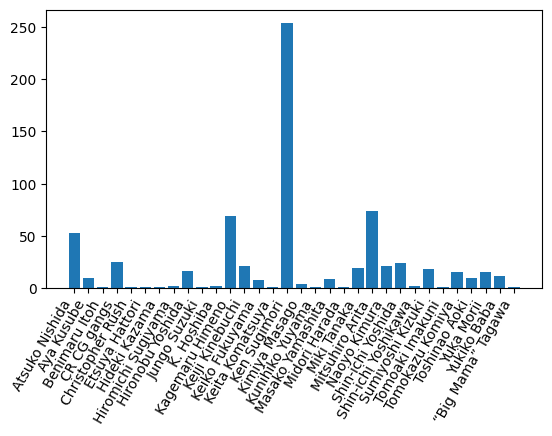

In [40]:
plt.figure()
plt.bar(x=unique_names, height=counts)
plt.xticks(rotation=60, ha='right')  # Rotate and align labels
plt.subplots_adjust(bottom=0.3)  # Adjust bottom margin
#plt.yscale('log')
plt.show()